# Yulu: Hypothesis Testing - Bhagyashree Sharma

# About Yulu and Problem Statement



Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t, ttest_1samp,ttest_ind, ttest_rel, chi2, chisquare, chi2_contingency, f_oneway, kstest
from scipy.stats import kruskal,levene,shapiro
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot

## Importing dataset

In [2]:
df = pd.read_csv(r"C:\Users\bsbha\OneDrive\Desktop\Scaler\Sacler Case Studies\Case Study 5 - Yulu\yulu.csv")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


It can be seen from the above two lines of code that there are a total of 10886 rows and 12 columns in the given dataset. Moreover, all the columns have a total of 10886 non-null values in them, which means there are no null values present in our dataset. 
That's fantastic, let us now closely observe the datatypes of columns -
1. datetime needs to be converted from object datatype to datetime datatype for better use case.
2. Certain caetgorical columns are of int datatype. It will be prudent to convert them to object datatype and make necessary changes for a better analysis of our data.

In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


Let us convert the datatype of a few columns - 

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [9]:
df['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter'],inplace=True)

In [10]:
df['workingday'] = df['workingday'].astype('str')

In [11]:
df['weather'] = df['weather'].astype('str')

In [12]:
df['holiday'] = df['holiday'].astype('str')

The RV that needs to be observed is named as count. This may create confusion during our analysis, hence let us change its name to something more appropriate, such as, total_rented_bikes.

In [13]:
df.rename(columns={'count':'total_rented_bikes'},inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10886 non-null  object        
 2   holiday             10886 non-null  object        
 3   workingday          10886 non-null  object        
 4   weather             10886 non-null  object        
 5   temp                10886 non-null  float64       
 6   atemp               10886 non-null  float64       
 7   humidity            10886 non-null  int64         
 8   windspeed           10886 non-null  float64       
 9   casual              10886 non-null  int64         
 10  registered          10886 non-null  int64         
 11  total_rented_bikes  10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


All the appropriate changes have been made. Let us now analyse our data!

In [32]:
df['datetime'].max(),df['datetime'].min()

(Timestamp('2012-12-19 23:00:00'), Timestamp('2011-01-01 00:00:00'))

In [30]:
((df['datetime'].max() - df['datetime'].min()).days)/365

1.9671232876712328

We can see that the data is distributed from 01 Jan 2011 (12 AM) to 19 December 2012 (11 PM) - a period of roughly 2 years.

#### Univariate Analysis 

In [21]:
def count_analysis(x):
    sns.countplot(x=x,data=df)
    return df[x].value_counts(normalize=True)*100

season
Winter    25.114826
Summer    25.105640
Fall      25.105640
Spring    24.673893
Name: proportion, dtype: float64

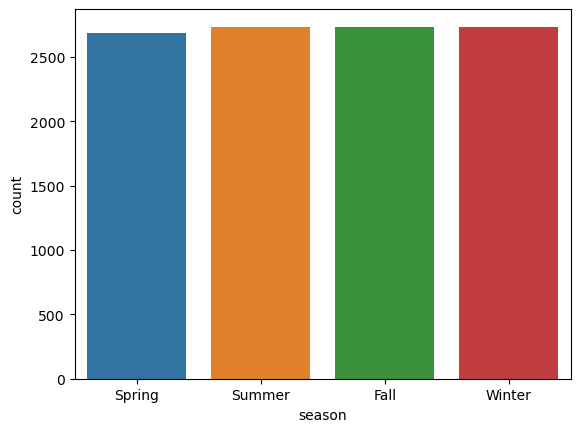

In [22]:
count_analysis('season')

It is observed that we have more or less same number of datapoints for each season.

holiday
0    97.14312
1     2.85688
Name: proportion, dtype: float64

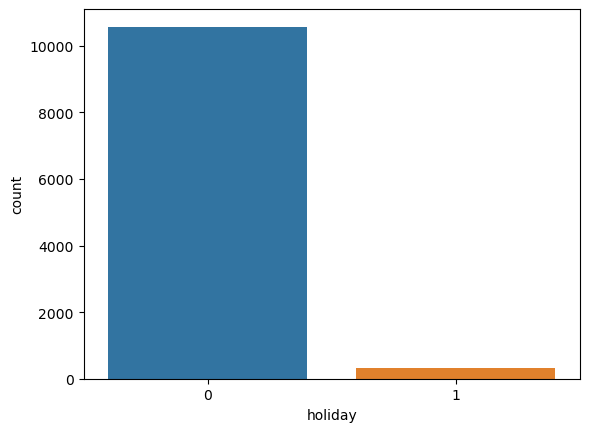

In [33]:
count_analysis('holiday')

As per the derived data - Roughly 3% of the data is from that of holidays and rest of the 97% data is from non-holidays.  

workingday
1    68.087452
0    31.912548
Name: proportion, dtype: float64

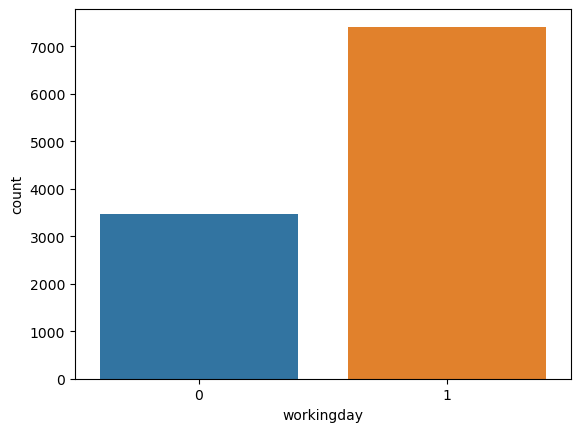

In [34]:
count_analysis('workingday')

Roughly 68% of the data is from a working day and 32% of the data is from a holiday / weekend.

weather
1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: proportion, dtype: float64

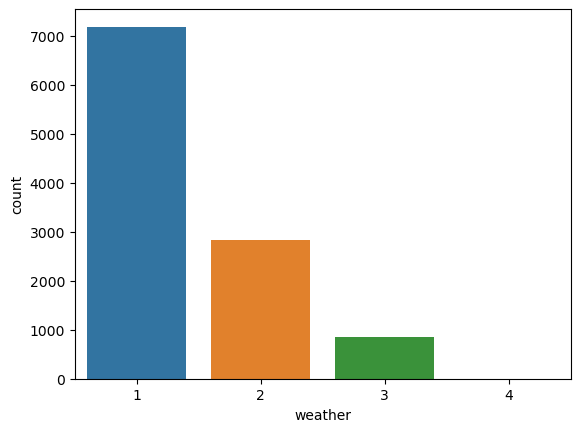

In [35]:
count_analysis('weather')

The weather variable is converted to a categorical variable. The values correspnd the following -
1. Clear, Few clouds, partly cloudy, partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Most of the data depicts clear weather (66%).

#### Bivariate Analysis

In [37]:
def bi_analysis(x,y,data=df):
    sns.barplot(x=x,y=y,data=data)

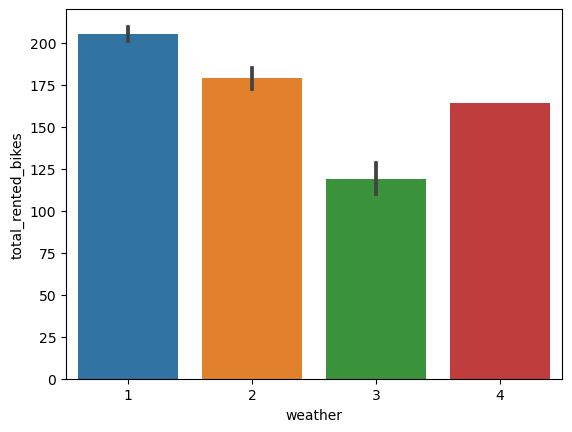

In [39]:
bi_analysis('weather','total_rented_bikes')

The above graph shows that there is an impact of weather on the total number of bikes rented. This needs further investigation. Let us first analyse some more of the categorical variables then conduct some tests to justify our alternate hypothesis.

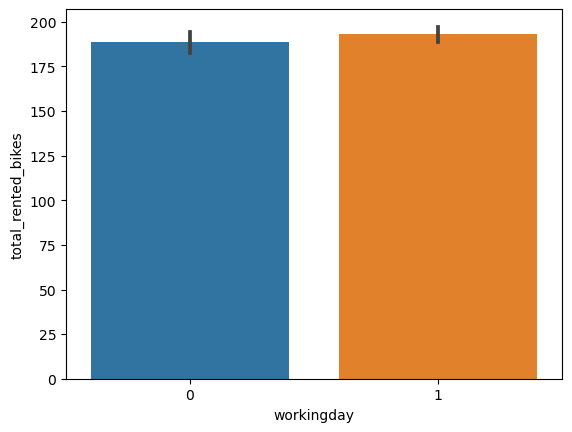

In [40]:
bi_analysis('workingday','total_rented_bikes')

The above ananlysis clearly depicts that there is not a significant difference between total number of bikes rented on a working day vs a non-working day. 

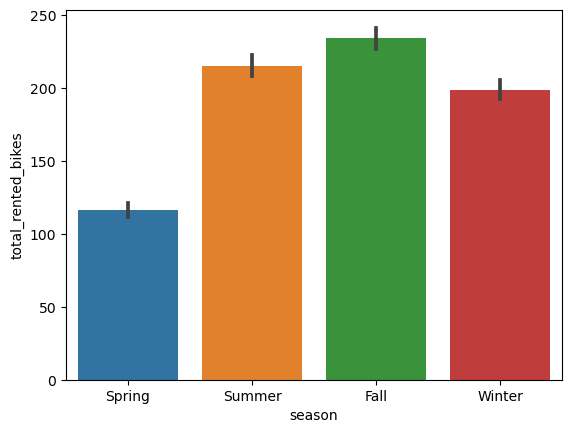

In [41]:
bi_analysis('season','total_rented_bikes')

There is a significant difference observed in the distribution of total number of bikes rented across the four seasons. This needs an investigation further!

<Axes: xlabel='weather'>

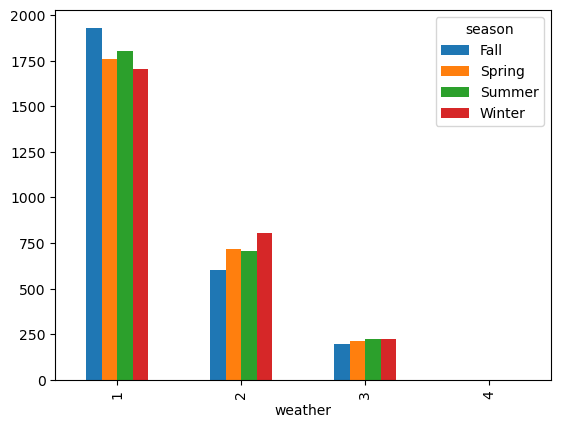

In [45]:
pd.crosstab(df['weather'],df['season']).plot(kind='bar')

It can be inferred from the above plot that weather is dependent upon the season as per our data for renting a bike. We can examine this further using chi-square test. But first, before moving forward let us check for the outliers in our dataset.

In [46]:
def distribution_analysis(x,y):
    sns.boxplot(x=x,y=y,data=df)

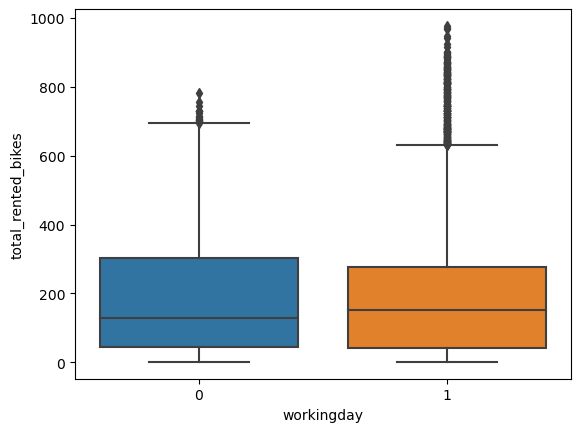

In [47]:
distribution_analysis('workingday','total_rented_bikes')

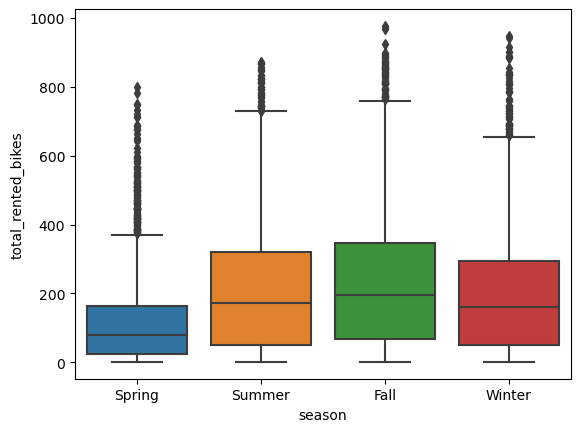

In [48]:
distribution_analysis('season','total_rented_bikes')

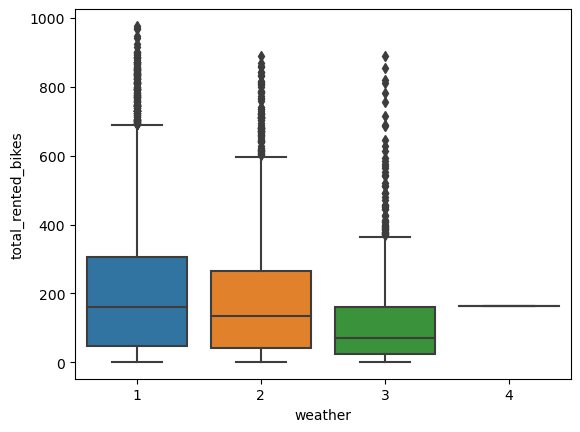

In [49]:
distribution_analysis('weather','total_rented_bikes')

In all the three cases above, we can see that total number of rented bikes -
1. Don't seem to differ across working / non-working days.
2. Differs across various seasons.
3. Differs across various weather conditions.

Also, there are a lot of outliers in each and every category. Thus to confirm our observation we need statistical evidence. For that let us first check how our data is distributed overall.

C:\Users\bsbha\AppData\Local\Temp\ipykernel_11932\3383997964.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['weather']=='4']['total_rented_bikes'], label = 4)


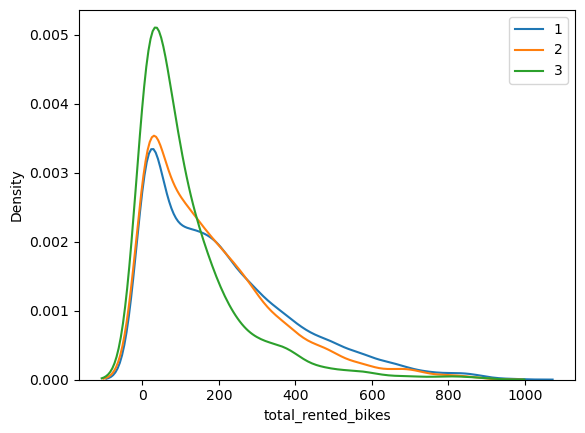

In [51]:
sns.kdeplot(df[df['weather']=='1']['total_rented_bikes'],label = 1)
sns.kdeplot(df[df['weather']=='2']['total_rented_bikes'], label = 2)
sns.kdeplot(df[df['weather']=='3']['total_rented_bikes'], label = 3)
sns.kdeplot(df[df['weather']=='4']['total_rented_bikes'], label = 4)
plt.legend()

In [50]:
len(df[df['weather']=='4']['total_rented_bikes'])

1

Since only data for single day is available for the weather '4'. Thus it is not plotted!

Also, it is observed that the data is right skewed for various weather conditions!

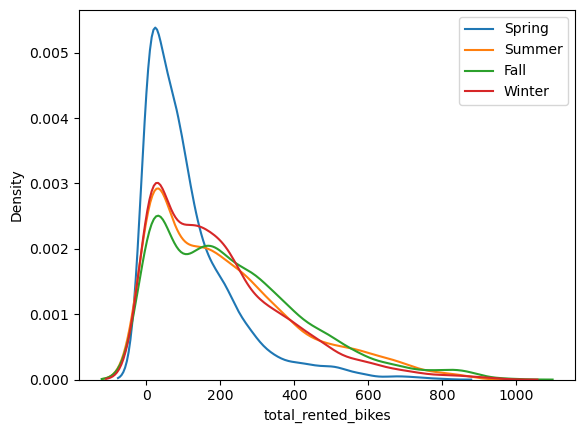

In [52]:
sns.kdeplot(df[df['season']=='Spring']['total_rented_bikes'],label='Spring')
sns.kdeplot(df[df['season']=='Summer']['total_rented_bikes'],label='Summer')
sns.kdeplot(df[df['season']=='Fall']['total_rented_bikes'],label='Fall')
sns.kdeplot(df[df['season']=='Winter']['total_rented_bikes'],label='Winter')
plt.legend()

Again the data is right skewed for season!

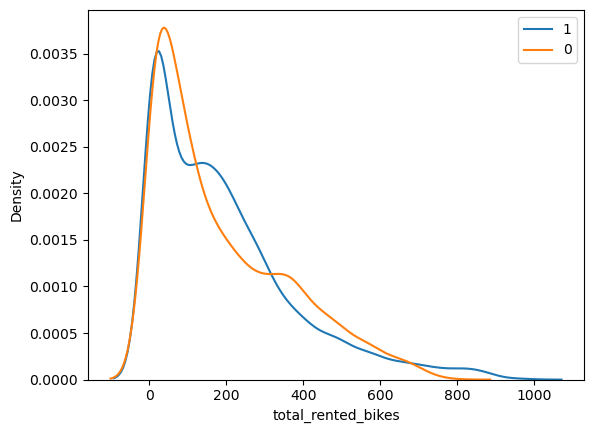

In [53]:
sns.kdeplot(df[df['workingday'] == '1']['total_rented_bikes'],label=1)
sns.kdeplot(df[df['workingday'] == '0']['total_rented_bikes'], label=0)
plt.legend()

<Axes: xlabel='total_rented_bikes', ylabel='Density'>

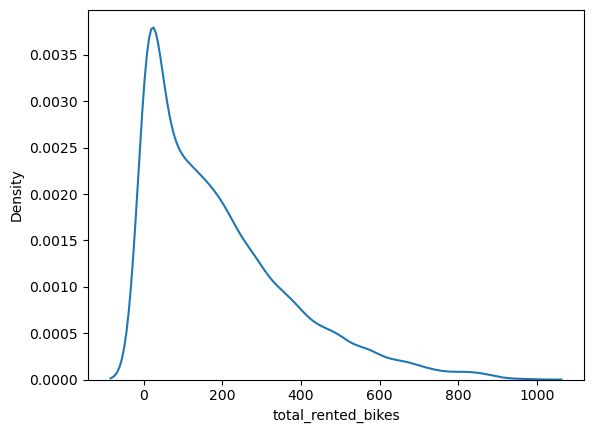

In [54]:
sns.kdeplot(df['total_rented_bikes'])

The distribution of total number of rented bikes does not appear normally distributed. Let us check this by plotting a qq plot!!

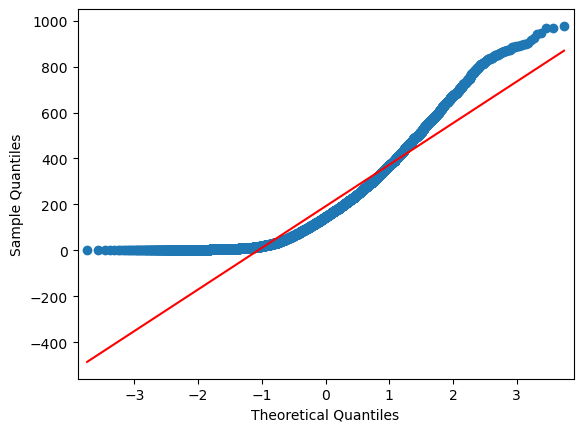

In [55]:
qqplot(df["total_rented_bikes"],line="s")
plt.show()

The overall analysis is that, the basic assumption, that the target variable is normally distributed doesn't stand true as per the given dataset. The RV is distributed is right skewed almost in every case viz. overall, in terms of different weather conditions, in differrent seasons, in a working / non-working day. 

Nonetheless, as per our bivariate visual analysis, let us now try to find some statistical evidence in support of our alternate hypothesis by conducting some tests on the various categories.

## 2 Sample T - Test

From our visual analysis we concluded that there seems no effect of working / non- working day on the total number of bikes rented. Here, to check if the working day / non-working day has an impact on the total number of bikes rented, we will conduct an independent t test on the two vectors for significance level of 0.10 and 0.05 repectively.

In [57]:
a = df[df['workingday'] == '1']['total_rented_bikes']
b = df[df['workingday'] == '0']['total_rented_bikes']
# Ho: No effect of working day on number of cycles rented (Null Hypothesis)
# Ha : There is an impact of working day on number of cycles rented (Alternate Hypothesis)
t_stat,p_value = ttest_ind(a,b)
alpha = 0.10
print('P_value : ',p_value)
if p_value < alpha:
    print('Reject Ho : which means there is an impact of working day on number of cycles rented')
else:
    print('Fail to reject Ho : which means there is no impact of working day on number of cycles rented')

P_value :  0.22644804226361348
Fail to reject Ho : which means there is no impact of working day on number of cycles rented


In [58]:
a = df[df['workingday'] == '1']['total_rented_bikes']
b = df[df['workingday'] == '0']['total_rented_bikes']
# Ho: No effect of working day on number of cycles rented
# Ha : There is an impact of working day on number of cycles rented
t_stat,p_value = ttest_ind(a,b)
alpha = 0.05
print('P_value : ',p_value)
if p_value < alpha:
    print('Reject Ho : which means there is an impact of working day on number of cycles rented')
else:
    print('Fail to reject Ho  which means there is no impact of working day on number of cycles rented')

P_value :  0.22644804226361348
Fail to reject Ho  which means there is no impact of working day on number of cycles rented


Thus we found our statistical eveidence that - 
1. Working / Non - working day has no significant impact on the number of cycles rented.

Now as per visual analysis we observed that there seems to be an impact of weather and season on the total number of cycles rented. To prove this let us conduct ANNOVA test on the vectors to gather statistical evidence for our observation.

## ANNOVA

Before conducting ANNOVA test, let us first find out if all the groups have equal variances!! 

First let us check for total_rented_bikes in different weather conditions. For this, let us set a significance level of 0.05 with Null Hypothesis : That every group has equal variance and Alternate Hypothesis : Every group has different variances.

In [59]:
a = df[df['weather'] == '1']['total_rented_bikes']
b = df[df['weather'] == '2']['total_rented_bikes']
c = df[df['weather'] == '3']['total_rented_bikes']
d = df[df['weather'] == '4']['total_rented_bikes']
levene(a,b,c,d,center='mean')

LeveneResult(statistic=61.54638448949361, pvalue=1.889180918625458e-39)

Although the pvalue is less than 0.05, lets still go with the ANNOVA test!

#### ANNOVA for - Total number of cycles rented are similar or different in different weather

In [60]:
#Ho:Total number of cycles rented are similar in different weather
#Ha: Total number of cycles renetd are differenr in differenr weather
a = df[df['weather'] == '1']['total_rented_bikes']
b = df[df['weather'] == '2']['total_rented_bikes']
c = df[df['weather'] == '3']['total_rented_bikes']
d = df[df['weather'] == '4']['total_rented_bikes']

f_stat,p_val = f_oneway(a,b,c,d)
print('P_value : ',p_val)
alpha = 0.10
if p_val < alpha:
    print('Reject Ho : which means total number of cycles rented are different in differnt weather')
else:
    print('Fail to reject Ho : which means total number of cycles rented are similar in different weather')

P_value :  5.482069475935669e-42
Reject Ho : which means total number of cycles rented are different in differnt weather


In [61]:
#Ho:Total number of cycles rented are similar in different weather
#Ha: Total number of cycles renetd are differenr in differenr weather
a = df[df['weather'] == '1']['total_rented_bikes']
b = df[df['weather'] == '2']['total_rented_bikes']
c = df[df['weather'] == '3']['total_rented_bikes']
d = df[df['weather'] == '4']['total_rented_bikes']

f_stat,p_val = f_oneway(a,b,c,d)
print('P_value : ',p_val)
alpha = 0.05
if p_val < alpha:
    print('Reject Ho : which means total number of cycles rented are different in differnt weather')
else:
    print('Fail to reject Ho : which means total number of cycles rented are similar in different weather')

P_value :  5.482069475935669e-42
Reject Ho : which means total number of cycles rented are different in differnt weather


Let us quickly verify the above observation with KS test as well for a significance level of 0.05

In [62]:
kstest(a,b,c,d)

KstestResult(statistic=0.06282082027941342, pvalue=2.0232588507344455e-07, statistic_location=177, statistic_sign=-1)

From the above KS test for a significance level of 0.05 we observed that p_value is actually less than alpha. Thus our observation stands true i.e. to reject the null hypothesis, meaning total number of cycles rented are different in different weather.

Thus we found our statistical eveidence that -

1. Weather conditions do have a significant impact on the number of cycles rented.

Let us now perform levene test on total number of cycles rented in different seasons. For this let us consider a significance level of 0.05 and basic assumption (Ho) that variances are equal.

In [63]:
a = df[df['season'] == 'Spring']['total_rented_bikes']
b = df[df['season'] == 'Summer']['total_rented_bikes']
c = df[df['season'] == 'Fall']['total_rented_bikes']
d = df[df['season'] == 'Winter']['total_rented_bikes']
levene(a,b,c,d)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

Although the pvalue is less than 0.05, lets still go with the ANNOVA test!

#### ANNOVA for: Total number of cycles rented are similar or different in different seasons

In [64]:
#Ho:Total number of cycles rented are similar in different seasons
#Ha: Total number of cycles renetd are differenr in differenr seasons
a = df[df['season'] == 'Spring']['total_rented_bikes']
b = df[df['season'] == 'Summer']['total_rented_bikes']
c = df[df['season'] == 'Fall']['total_rented_bikes']
d = df[df['season'] == 'Winter']['total_rented_bikes']

f_stat,p_val = f_oneway(a,b,c,d)

print('P_value : ',p_val)
alpha = 0.10
if p_val < alpha:
    print('Reject Ho : which means total number of cycles rented are different in differnt seasons')
else:
    print('Fail to reject Ho : which means total number of cycles rented are similar in different seasons')

P_value :  6.164843386499654e-149
Reject Ho : which means total number of cycles rented are different in differnt seasons


In [65]:
#Ho:Total number of cycles rented are similar in different seasons
#Ha: Total number of cycles renetd are differenr in differenr seasons
a = df[df['season'] == 'Spring']['total_rented_bikes']
b = df[df['season'] == 'Summer']['total_rented_bikes']
c = df[df['season'] == 'Fall']['total_rented_bikes']
d = df[df['season'] == 'Winter']['total_rented_bikes']

f_stat,p_val = f_oneway(a,b,c,d)

print('P_value : ',p_val)
alpha = 0.05
if p_val < alpha:
    print('Reject Ho : which means total number of cycles rented are different in differnt seasons')
else:
    print('Fail to reject Ho : which means total number of cycles rented are similar in different seasons')

P_value :  6.164843386499654e-149
Reject Ho : which means total number of cycles rented are different in differnt seasons


Let us quickly verify the above observation with KS test as well for a significance level of 0.05

In [66]:
kstest(a,b,c,d)

KstestResult(statistic=0.27401258548410956, pvalue=5.229818428809134e-90, statistic_location=148, statistic_sign=1)

From the above KS test for a significance level of 0.05 we observed that p_value is actually less than alpha. Thus our observation stands true i.e. to reject the null hypothesis, meaning total number of cycles rented are different in different seasons.

Thus we found our statistical eveidence that -

1. Seasons do have a significant impact on the number of cycles rented.

From the above analysis we did observe that weather and season may have dependency on each other. Let us find out using chi-square.

## Chisquare 

In [67]:
# Ho : weather and season are independent
# Ha : weather and season are dependent 

alpha = 0.10
chi_stat, p_value, dof, exe_feq = chi2_contingency(pd.crosstab(df['weather'],df['season']))
print('P_Value : ',p_value)
if p_value < alpha:
    print('Reject the null hypothesis : which means weather and season are dependent')
else:
    print('Fail to reject the null hypothesis : which means weather and season are independent')

P_Value :  1.5499250736864862e-07
Reject the null hypothesis : which means weather and season are dependent


In [68]:
# Ho : weather and season are independent
# Ha : weather and season are dependent 

alpha = 0.05
chi_stat, p_value, dof, exe_feq = chi2_contingency(pd.crosstab(df['weather'],df['season']))
print('P_Value : ',p_value)
if p_value < alpha:
    print('Reject the null hypothesis : which means weather and season are dependent')
else:
    print('Fail to reject the null hypothesis : which means weather and season are independent')

P_Value :  1.5499250736864862e-07
Reject the null hypothesis : which means weather and season are dependent


In [69]:
# Ho : weather and season are independent
# Ha : weather and season are dependent 

alpha = 0.01
chi_stat, p_value, dof, exe_feq = chi2_contingency(pd.crosstab(df['weather'],df['season']))
print('P_Value : ',p_value)
if p_value < alpha:
    print('Reject the null hypothesis : which means weather and season are dependent')
else:
    print('Fail to reject the null hypothesis : which means weather and season are independent')

P_Value :  1.5499250736864862e-07
Reject the null hypothesis : which means weather and season are dependent


For different significance levels we gathered the statistical evidence that -
1. Weather and season are dependent.

# RECOMMENDATIONS - 

1. As we have already established that the total number of bikes rented is dependent upon the -
a). Weather
b). Season

    Thus there can be a number of things that YULU can do to increase the revenue, like - 
    1. Give weather related packages - like in case of bad weather conditions, YULU can provide rain gear as part of rental package, which can provide additional convenience to its users.
    2. Introduce seasonal pricing - give more offers / lower charges during bad weather conditions.
    3. Engage with the users / audiences in social media showcasing the biking in different weather conditions, safety tips during that. 
    4. Implement flexible cancellation policies during  This can provide reassurance to customers encouraging them to make reservations even if the weather forecast is uncertain.
    5. As less number of bikes are observed in the spring season then YULU can organise spring themed events which can encourage users to take part in the events and ride bikes.
    6. Increase marketing around the fact that how renting a bike during bad weather conditions can curb the traffic and how it is beneficial for the environment.

2. Overall, to increase the revenue, YULU can work on the easy to handle website / mobile app.
3. Train staff more effectively on how to handle issues more proficiently.
4. Spread more awareness on environmental benefits on renting bikes.